### Intro to AutoEncoders and MNIST Dataset

"Today two interesting practical applications of autoencoders are data denoising, and dimensionality reduction for data visualization" ...  
"autoencoders can learn data projections that are more interesting than PCA" [source](https://blog.keras.io/building-autoencoders-in-keras.html)  

"one reason why they have attracted so much research and attention is because they have long been thought to be a potential avenue for solving the problem of unsupervised learning, i.e. the learning of useful representations without the need for labels" ...  
"there is significant evidence that focusing on the reconstruction of a picture at the pixel level, for instance, is not conductive to learning interesting, abstract features of the kind that label-supervized learning induces" [source](https://blog.keras.io/building-autoencoders-in-keras.html)  

Previous example: [/examples/nlp/intro.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/nlp/intro.ipynb)  
Modified from: [blog.keras.io/building-autoencoders-in-keras](https://blog.keras.io/building-autoencoders-in-keras.html)  
It was the last example. [Return to the main page](https://github.com/serhatsoyer/py4ML)

In [1]:
from IPython.display import Image
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

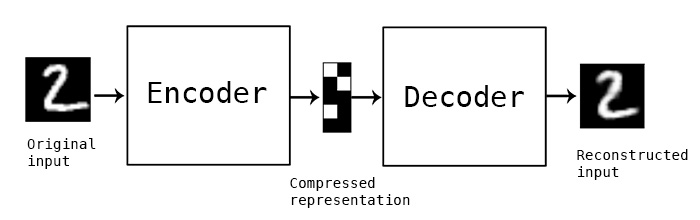

In [2]:
Image('https://blog.keras.io/img/ae/autoencoder_schema.jpg')

In [3]:
# This is the size of our encoded representations
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-12-29 10:44:17.931890: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-29 10:44:17.932290: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
(x_train, _), (x_test, _) = mnist.load_data() # Labels ignored
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 784)
(10000, 784)


In [5]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50


2022-12-29 10:44:20.683639: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-29 10:44:20.851279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 2s 6ms/step - loss: 0.2757 - val_loss: 0.1924
Epoch 2/50
  1/235 [..............................] - ETA: 1s - loss: 0.1963

2022-12-29 10:44:22.737613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 5ms/step - loss: 0.1727 - val_loss: 0.1542
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1445 - val_loss: 0.1341
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1290 - val_loss: 0.1221
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1191 - val_loss: 0.1139
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1122 - val_loss: 0.1080
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1072 - val_loss: 0.1037
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1034 - val_loss: 0.1005
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1005 - val_loss: 0.0978
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0982 - val_loss: 0.0959
Epoch 11/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0966 - val_loss: 0.0947
Epoch 12/

In [6]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

195/313 [=================>............] - ETA: 0s

2022-12-29 10:45:19.620614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


146/313 [============>.................] - ETA: 0s

2022-12-29 10:45:19.973892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 711us/step


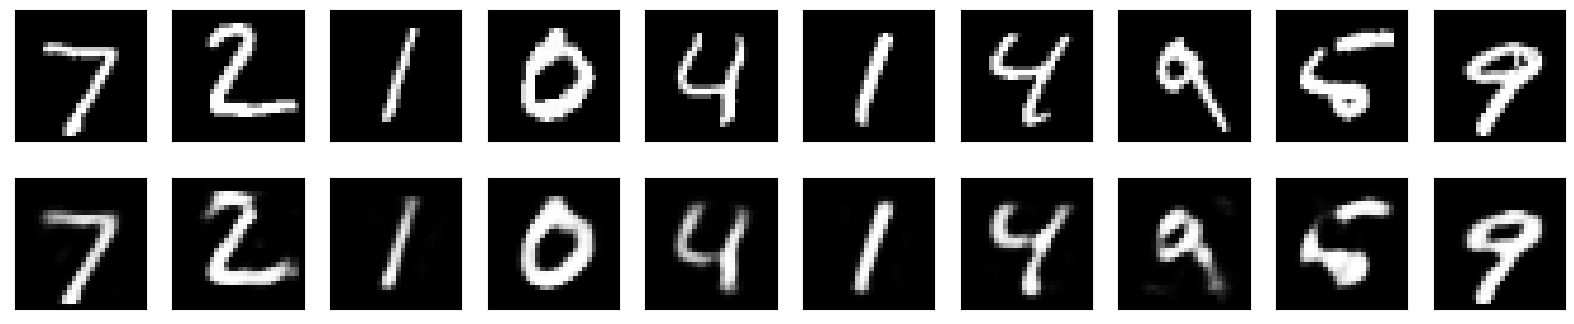

In [7]:
num_of_digits_to_display = 10
plt.figure(figsize=(20, 4))
for digit_idx in range(num_of_digits_to_display):
    # Display original
    ax = plt.subplot(2, num_of_digits_to_display, digit_idx + 1)
    plt.imshow(x_test[digit_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, num_of_digits_to_display, digit_idx + 1 + num_of_digits_to_display)
    plt.imshow(decoded_imgs[digit_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Previous example: [/examples/nlp/intro.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/nlp/intro.ipynb)  
Modified from: [blog.keras.io/building-autoencoders-in-keras](https://blog.keras.io/building-autoencoders-in-keras.html)  
It was the last example. [Return to the main page](https://github.com/serhatsoyer/py4ML)